In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_classes=2, 
                           n_clusters_per_class=1, 
                           random_state=15, n_redundant=0)

In [14]:
df = pd.DataFrame(X)

<Axes: xlabel='0', ylabel='1'>

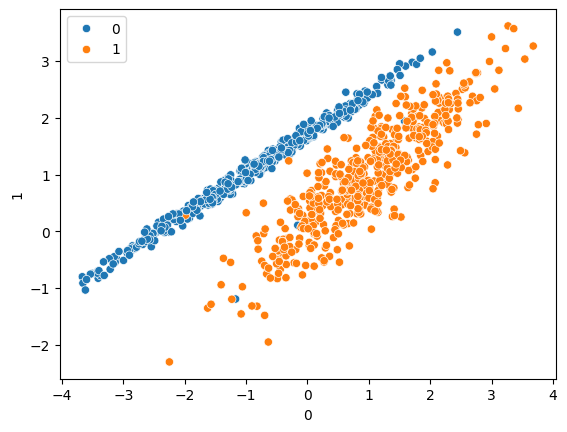

In [15]:
sns.scatterplot(x=df[0], y=df[1], hue=y)

In [18]:
from sklearn.svm import SVC

svc = SVC()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [19]:
svc.fit(X_train, y_train)

SVC()

In [20]:
y_pred = svc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       126
           1       0.98      0.99      0.99       124

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[124   2]
 [  1 123]]


In [22]:
rbf = SVC(kernel='rbf')

X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_classes=2, 
                           n_clusters_per_class=2, 
                           random_state=15, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

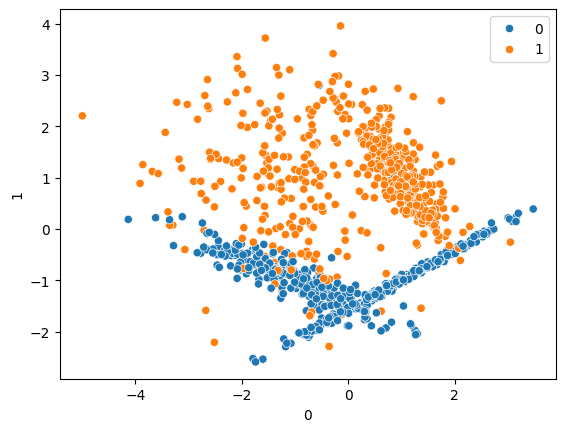

In [23]:
df = pd.DataFrame(X)
sns.scatterplot(x=df[0], y=df[1], hue=y)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [25]:
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       125
           1       0.98      0.93      0.95       125

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[123   2]
 [  9 116]]


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}


In [28]:
grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    verbose=3,
    refit=True
)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [31]:
grid.best_score_

np.float64(0.9480000000000001)

In [32]:
y_pred = grid.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       125
           1       0.99      0.94      0.97       125

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[124   1]
 [  7 118]]
